In [12]:
using Nullables
using DataFrames
using Rasters
using Plots
using Dates
import STARS.coarse_fine_data_fusion
import STARS.DataFusionState

In [13]:
const FINE_IMAGES_DIRECTORY = joinpath(@__DIR__, "salton_sea_fine_NIR")
const COARSE_IMAGES_DIRECTORY = joinpath(@__DIR__, "salton_sea_coarse_NIR")
println("fine images directory: $(FINE_IMAGES_DIRECTORY)")
println("coarse images directory: $(COARSE_IMAGES_DIRECTORY)")

fine images directory: /Users/halverso/Projects/STARS.jl/examples/salton_sea_fine_NIR
coarse images directory: /Users/halverso/Projects/STARS.jl/examples/salton_sea_coarse_NIR


In [14]:
coarse_image_filenames = filter(x -> endswith(x, ".tif"), readdir(COARSE_IMAGES_DIRECTORY, join=true))
coarse_dates = map(filename -> Date(split(basename(filename), "_")[1]), coarse_image_filenames)
coarse_x = Raster(coarse_image_filenames[1]).dims[1]
coarse_y = Raster(coarse_image_filenames[1]).dims[2]
coarse_dims = (coarse_x, coarse_y, Ti(coarse_dates))
coarse_images = Raster(cat(Raster.(coarse_image_filenames, missingval=NaN)..., dims=3), dims=coarse_dims)

20×20×92 Raster{Float64,3} with dimensions: 
  X Projected{Float64} LinRange{Float64}(649980.0, 659290.0, 20) ForwardOrdered Regular Intervals crs: WellKnownText,
  Y Projected{Float64} LinRange{Float64}(3.65935e6, 3.65004e6, 20) ReverseOrdered Regular Intervals crs: WellKnownText,
  Ti Sampled{Date} Date[2020-10-01, …, 2020-12-31] ForwardOrdered Irregular Points
extent: Extent(X = (649980.0, 659780.0), Y = (3.65004e6, 3.65984e6), Ti = (Date("2020-10-01"), Date("2020-12-31")))missingval: NaNcrs: PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre

In [15]:
typeof(coarse_images.dims[1])

X{Projected{Float64, LinRange{Float64, Int64}, DimensionalData.Dimensions.LookupArrays.ForwardOrdered, DimensionalData.Dimensions.LookupArrays.Regular{Float64}, DimensionalData.Dimensions.LookupArrays.Intervals{DimensionalData.Dimensions.LookupArrays.Start}, DimensionalData.Dimensions.LookupArrays.Metadata{Rasters.GDALfile, Dict{String, Any}}, WellKnownText{GeoFormatTypes.CRS}, Nothing, X{Colon}}}

In [16]:
coarse_dates[12:17][4]

2020-10-15

In [17]:
fine_image_filenames = filter(x -> endswith(x, ".tif"), readdir(FINE_IMAGES_DIRECTORY, join=true))
fine_dates = map(filename -> Date(split(basename(filename), "_")[1]), fine_image_filenames)
fine_x = Raster(fine_image_filenames[1]).dims[1]
fine_y = Raster(fine_image_filenames[1]).dims[2]
fine_dims = (fine_x, fine_y, Ti(fine_dates))
fine_images = Raster(cat(Raster.(fine_image_filenames, missingval=NaN)..., dims=3), dims=fine_dims)

140×140×92 Raster{Float64,3} with dimensions: 
  X Projected{Float64} LinRange{Float64}(649980.0, 659710.0, 140) ForwardOrdered Regular Intervals crs: WellKnownText,
  Y Projected{Float64} LinRange{Float64}(3.65977e6, 3.65004e6, 140) ReverseOrdered Regular Intervals crs: WellKnownText,
  Ti Sampled{Date} Date[2020-10-01, …, 2020-12-31] ForwardOrdered Irregular Points
extent: Extent(X = (649980.0, 659780.0), Y = (3.65004e6, 3.65984e6), Ti = (Date("2020-10-01"), Date("2020-12-31")))missingval: NaNcrs: PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["m

In [18]:
fine_images[:,:,[1]]

140×140×1 Raster{Float64,3} with dimensions: 
  X Projected{Float64} LinRange{Float64}(649980.0, 659710.0, 140) ForwardOrdered Regular Intervals crs: WellKnownText,
  Y Projected{Float64} LinRange{Float64}(3.65977e6, 3.65004e6, 140) ReverseOrdered Regular Intervals crs: WellKnownText,
  Ti Sampled{Date} Date[Date("2020-10-01")] ForwardOrdered Irregular Points
extent: Extent(X = (649980.0, 659780.0), Y = (3.65004e6, 3.65984e6), Ti = (Date("2020-10-01"), Date("2020-10-01")))missingval: NaNcrs: PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,

In [19]:
fine_images[:,:,At([Date("2020-10-01"), Date("2020-10-02")])]

140×140×2 Raster{Float64,3} with dimensions: 
  X Projected{Float64} LinRange{Float64}(649980.0, 659710.0, 140) ForwardOrdered Regular Intervals crs: WellKnownText,
  Y Projected{Float64} LinRange{Float64}(3.65977e6, 3.65004e6, 140) ReverseOrdered Regular Intervals crs: WellKnownText,
  Ti Sampled{Date} Date[Date("2020-10-01"), Date("2020-10-02")] ForwardOrdered Irregular Points
extent: Extent(X = (649980.0, 659780.0), Y = (3.65004e6, 3.65984e6), Ti = (Date("2020-10-01"), Date("2020-10-02")))missingval: NaNcrs: PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing

In [20]:
fine_images[:,:,[4]]

140×140×1 Raster{Float64,3} with dimensions: 
  X Projected{Float64} LinRange{Float64}(649980.0, 659710.0, 140) ForwardOrdered Regular Intervals crs: WellKnownText,
  Y Projected{Float64} LinRange{Float64}(3.65977e6, 3.65004e6, 140) ReverseOrdered Regular Intervals crs: WellKnownText,
  Ti Sampled{Date} Date[Date("2020-10-04")] ForwardOrdered Irregular Points
extent: Extent(X = (649980.0, 659780.0), Y = (3.65004e6, 3.65984e6), Ti = (Date("2020-10-04"), Date("2020-10-04")))missingval: NaNcrs: PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,

##### Fuse single target date 

Progress:   0%|▎                                        |  ETA: 0:21:07

Progress:   3%|█▎                                       |  ETA: 0:03:43

Progress:   5%|██▏                                      |  ETA: 0:02:09

Progress:   6%|██▌                                      |  ETA: 0:01:55

Progress:   6%|██▋                                      |  ETA: 0:01:47

Progress:   7%|██▉                                      |  ETA: 0:01:41

Progress:   8%|███▏                                     |  ETA: 0:01:35

Progress:   8%|███▎                                     |  ETA: 0:01:30

Progress:   8%|███▌                                     |  ETA: 0:01:26

Progress:   9%|███▊                                     |  ETA: 0:01:22

Progress:  10%|███▉                                     |  ETA: 0:01:19

Progress:  10%|████▏                                    |  ETA: 0:01:15

Progress:  11%|████▌                                    |  ETA: 0:01:09

Progress:  12%|████▊                                    |  ETA: 0:01:07

Progress:  12%|████▉                                    |  ETA: 0:01:05

Progress:  12%|█████▏                                   |  ETA: 0:01:03

Progress:  13%|█████▍                                   |  ETA: 0:01:01

Progress:  14%|█████▌                                   |  ETA: 0:00:59

Progress:  14%|█████▊                                   |  ETA: 0:00:58

Progress:  14%|██████                                   |  ETA: 0:00:56

Progress:  15%|██████▏                                  |  ETA: 0:00:55

Progress:  16%|██████▌                                  |  ETA: 0:00:52

Progress:  16%|██████▊                                  |  ETA: 0:00:51

Progress:  17%|███████                                  |  ETA: 0:00:50

Progress:  18%|███████▏                                 |  ETA: 0:00:49

Progress:  18%|███████▎                                 |  ETA: 0:00:48

Progress:  18%|███████▌                                 |  ETA: 0:00:47

Progress:  19%|███████▊                                 |  ETA: 0:00:46

Progress:  19%|███████▉                                 |  ETA: 0:00:46

Progress:  20%|████████▏                                |  ETA: 0:00:45

Progress:  20%|████████▍                                |  ETA: 0:00:43

Progress:  21%|████████▋                                |  ETA: 0:00:42

Progress:  22%|████████▉                                |  ETA: 0:00:42

Progress:  22%|█████████                                |  ETA: 0:00:41

Progress:  22%|█████████▎                               |  ETA: 0:00:40

Progress:  23%|█████████▍                               |  ETA: 0:00:39

Progress:  24%|█████████▋                               |  ETA: 0:00:39

Progress:  24%|█████████▉                               |  ETA: 0:00:38

Progress:  24%|██████████                               |  ETA: 0:00:38

Progress:  25%|██████████▎                              |  ETA: 0:00:37

Progress:  26%|██████████▋                              |  ETA: 0:00:36

Progress:  26%|██████████▉                              |  ETA: 0:00:35

Progress:  27%|███████████▏                             |  ETA: 0:00:35

Progress:  28%|███████████▎                             |  ETA: 0:00:34

Progress:  28%|███████████▌                             |  ETA: 0:00:34

Progress:  28%|███████████▋                             |  ETA: 0:00:33

Progress:  29%|███████████▉                             |  ETA: 0:00:33

Progress:  30%|████████████▏                            |  ETA: 0:00:32

Progress:  30%|████████████▎                            |  ETA: 0:00:32

Progress:  31%|████████████▊                            |  ETA: 0:00:31

Progress:  32%|████████████▉                            |  ETA: 0:00:31

Progress:  32%|█████████████▏                           |  ETA: 0:00:30

Progress:  32%|█████████████▍                           |  ETA: 0:00:30

Progress:  33%|█████████████▌                           |  ETA: 0:00:29

Progress:  34%|█████████████▊                           |  ETA: 0:00:29

Progress:  34%|██████████████                           |  ETA: 0:00:29

Progress:  34%|██████████████▏                          |  ETA: 0:00:28

Progress:  35%|██████████████▍                          |  ETA: 0:00:28

Progress:  36%|██████████████▋                          |  ETA: 0:00:27

Progress:  36%|██████████████▉                          |  ETA: 0:00:27

Progress:  37%|███████████████▏                         |  ETA: 0:00:27

Progress:  37%|███████████████▎                         |  ETA: 0:00:26

Progress:  38%|███████████████▌                         |  ETA: 0:00:26

Progress:  38%|███████████████▋                         |  ETA: 0:00:26

Progress:  39%|███████████████▉                         |  ETA: 0:00:25

Progress:  39%|████████████████▏                        |  ETA: 0:00:25

Progress:  40%|████████████████▎                        |  ETA: 0:00:25

Progress:  40%|████████████████▋                        |  ETA: 0:00:24

Progress:  41%|████████████████▊                        |  ETA: 0:00:24

Progress:  42%|█████████████████                        |  ETA: 0:00:23

Progress:  42%|█████████████████▎                       |  ETA: 0:00:23

Progress:  42%|█████████████████▍                       |  ETA: 0:00:23

Progress:  43%|█████████████████▋                       |  ETA: 0:00:23

Progress:  44%|█████████████████▉                       |  ETA: 0:00:22

Progress:  44%|██████████████████                       |  ETA: 0:00:22

Progress:  44%|██████████████████▎                      |  ETA: 0:00:22

Progress:  45%|██████████████████▌                      |  ETA: 0:00:22

Progress:  46%|██████████████████▉                      |  ETA: 0:00:21

Progress:  46%|███████████████████▏                     |  ETA: 0:00:21

Progress:  47%|███████████████████▎                     |  ETA: 0:00:20

Progress:  48%|███████████████████▌                     |  ETA: 0:00:20

Progress:  48%|███████████████████▋                     |  ETA: 0:00:20

Progress:  48%|███████████████████▉                     |  ETA: 0:00:20

Progress:  49%|████████████████████▏                    |  ETA: 0:00:19

Progress:  50%|████████████████████▎                    |  ETA: 0:00:19

Progress:  50%|████████████████████▌                    |  ETA: 0:00:19

Progress:  51%|████████████████████▉                    |  ETA: 0:00:18

Progress:  52%|█████████████████████▏                   |  ETA: 0:00:18

Progress:  52%|█████████████████████▍                   |  ETA: 0:00:18

Progress:  52%|█████████████████████▌                   |  ETA: 0:00:18

Progress:  53%|█████████████████████▋                   |  ETA: 0:00:18

Progress:  53%|█████████████████████▉                   |  ETA: 0:00:17

Progress:  54%|██████████████████████                   |  ETA: 0:00:17

Progress:  54%|██████████████████████▎                  |  ETA: 0:00:17

Progress:  55%|██████████████████████▌                  |  ETA: 0:00:17

Progress:  55%|██████████████████████▋                  |  ETA: 0:00:16

Progress:  56%|███████████████████████                  |  ETA: 0:00:16

Progress:  56%|███████████████████████▏                 |  ETA: 0:00:16

Progress:  57%|███████████████████████▍                 |  ETA: 0:00:16

Progress:  58%|███████████████████████▋                 |  ETA: 0:00:16

Progress:  58%|███████████████████████▊                 |  ETA: 0:00:15

Progress:  58%|████████████████████████                 |  ETA: 0:00:15

Progress:  59%|████████████████████████▎                |  ETA: 0:00:15

Progress:  60%|████████████████████████▍                |  ETA: 0:00:15

Progress:  60%|████████████████████████▋                |  ETA: 0:00:14

Progress:  61%|█████████████████████████                |  ETA: 0:00:14

Progress:  62%|█████████████████████████▎               |  ETA: 0:00:14

Progress:  62%|█████████████████████████▍               |  ETA: 0:00:14

Progress:  62%|█████████████████████████▋               |  ETA: 0:00:13

Progress:  63%|█████████████████████████▉               |  ETA: 0:00:13

Progress:  63%|█████████████████████████▉               |  ETA: 0:00:13

Progress:  64%|██████████████████████████▏              |  ETA: 0:00:13

Progress:  64%|██████████████████████████▍              |  ETA: 0:00:13

Progress:  65%|██████████████████████████▌              |  ETA: 0:00:13

Progress:  66%|██████████████████████████▉              |  ETA: 0:00:12

Progress:  66%|███████████████████████████              |  ETA: 0:00:12

Progress:  66%|███████████████████████████▎             |  ETA: 0:00:12

Progress:  67%|███████████████████████████▌             |  ETA: 0:00:12

Progress:  68%|███████████████████████████▋             |  ETA: 0:00:11

Progress:  68%|███████████████████████████▉             |  ETA: 0:00:11

Progress:  68%|████████████████████████████▏            |  ETA: 0:00:11

Progress:  69%|████████████████████████████▎            |  ETA: 0:00:11

Progress:  70%|████████████████████████████▌            |  ETA: 0:00:11

Progress:  70%|████████████████████████████▊            |  ETA: 0:00:10

Progress:  71%|█████████████████████████████▏           |  ETA: 0:00:10

Progress:  72%|█████████████████████████████▍           |  ETA: 0:00:10

Progress:  72%|█████████████████████████████▌           |  ETA: 0:00:10

Progress:  72%|█████████████████████████████▊           |  ETA: 0:00:09

Progress:  73%|█████████████████████████████▉           |  ETA: 0:00:09

Progress:  74%|██████████████████████████████▏          |  ETA: 0:00:09

Progress:  74%|██████████████████████████████▍          |  ETA: 0:00:09

Progress:  74%|██████████████████████████████▌          |  ETA: 0:00:09

Progress:  75%|██████████████████████████████▋          |  ETA: 0:00:09

Progress:  76%|███████████████████████████████          |  ETA: 0:00:08

Progress:  76%|███████████████████████████████▏         |  ETA: 0:00:08

Progress:  76%|███████████████████████████████▍         |  ETA: 0:00:08

Progress:  77%|███████████████████████████████▋         |  ETA: 0:00:08

Progress:  78%|███████████████████████████████▊         |  ETA: 0:00:08

Progress:  78%|████████████████████████████████         |  ETA: 0:00:07

Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:07

Progress:  79%|████████████████████████████████▍        |  ETA: 0:00:07

Progress:  80%|████████████████████████████████▋        |  ETA: 0:00:07

Progress:  80%|████████████████████████████████▊        |  ETA: 0:00:07

Progress:  81%|█████████████████████████████████▎       |  ETA: 0:00:06

Progress:  82%|█████████████████████████████████▍       |  ETA: 0:00:06

Progress:  82%|█████████████████████████████████▋       |  ETA: 0:00:06

Progress:  82%|█████████████████████████████████▉       |  ETA: 0:00:06

Progress:  83%|██████████████████████████████████       |  ETA: 0:00:06

Progress:  84%|██████████████████████████████████▎      |  ETA: 0:00:06

Progress:  84%|██████████████████████████████████▌      |  ETA: 0:00:05

Progress:  84%|██████████████████████████████████▋      |  ETA: 0:00:05

Progress:  85%|██████████████████████████████████▉      |  ETA: 0:00:05

Progress:  86%|███████████████████████████████████▏     |  ETA: 0:00:05

Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:05

Progress:  87%|███████████████████████████████████▋     |  ETA: 0:00:04

Progress:  87%|███████████████████████████████████▊     |  ETA: 0:00:04

Progress:  88%|████████████████████████████████████     |  ETA: 0:00:04

Progress:  88%|████████████████████████████████████▏    |  ETA: 0:00:04

Progress:  89%|████████████████████████████████████▍    |  ETA: 0:00:04

Progress:  89%|████████████████████████████████████▋    |  ETA: 0:00:04

Progress:  90%|████████████████████████████████████▊    |  ETA: 0:00:03

Progress:  90%|████████████████████████████████████▉    |  ETA: 0:00:03

Progress:  91%|█████████████████████████████████████▎   |  ETA: 0:00:03

Progress:  91%|█████████████████████████████████████▍   |  ETA: 0:00:03

Progress:  92%|█████████████████████████████████████▋   |  ETA: 0:00:03

Progress:  92%|█████████████████████████████████████▉   |  ETA: 0:00:03

Progress:  93%|██████████████████████████████████████   |  ETA: 0:00:02

Progress:  93%|██████████████████████████████████████▎  |  ETA: 0:00:02

Progress:  94%|██████████████████████████████████████▌  |  ETA: 0:00:02

Progress:  94%|██████████████████████████████████████▋  |  ETA: 0:00:02

Progress:  95%|██████████████████████████████████████▉  |  ETA: 0:00:02

Progress:  95%|███████████████████████████████████████  |  ETA: 0:00:02

Progress:  96%|███████████████████████████████████████▋ |  ETA: 0:00:01

Progress:  98%|████████████████████████████████████████ |  ETA: 0:00:01

Progress:  98%|████████████████████████████████████████▍|  ETA: 0:00:00

Progress: 100%|████████████████████████████████████████▊|  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:00:32


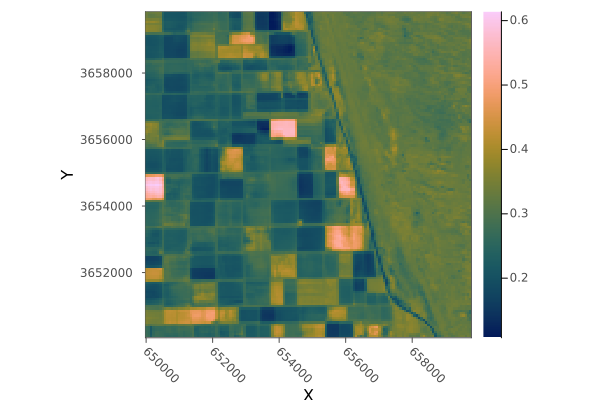

In [21]:
result = coarse_fine_data_fusion(
    coarse_images[:,:,12:17], 
    fine_images[:,:,12:17], 
    target_times = [4]
)

plot(result.mean[:,:,1])

In [22]:
coarse_cell_width, coarse_cell_height = cell_size(coarse_images)

UndefVarError: UndefVarError: cell_size not defined

In [23]:
result = data_fusion(
    coarse_images[:,:,12:17], 
    fine_images[:,:,12:17], 
    target_times = [4],
    buffer_distance = coarse_cell_width / 2.0
)

plot(result.mean[:,:,1])

UndefVarError: UndefVarError: coarse_cell_width not defined

In [12]:
result = data_fusion(
    coarse_images[:,:,12:17], 
    fine_images[:,:,12:17], 
    target_times = [1]
)

plot(result.mean[:,:,1])

UndefVarError: UndefVarError: data_fusion not defined

In [13]:
result = data_fusion(
    coarse_images[:,:,12:17], 
    fine_images[:,:,12:17], 
    target_times = ["2020-10-15"]
)

plot(result.mean[:,:,1])

UndefVarError: UndefVarError: data_fusion not defined

#### Fuse for collection of times, currently only works for contiguous times

In [14]:
result = data_fusion(
    coarse_images[:,:,12:17],
    fine_images[:,:,12:17], 
    target_times = 3:5
);

UndefVarError: UndefVarError: data_fusion not defined

In [15]:
plot(result.mean[:,:,2])

UndefVarError: UndefVarError: result not defined

In [16]:
plot(result.mean_bias[:,:,2])

UndefVarError: UndefVarError: result not defined

#### Streaming example

#### No lag

In [17]:
mkpath("./streaming_demo")

result = spatio_temporal_data_fusion_general(
    coarse_images[:,:,12:12], 
    fine_images[:,:,12:12], 
    target_times = [1]
)

write("./streaming_demo/fused_target_" * string(coarse_dates[12]) * ".tif", result.mean[:,:,1])
write("./streaming_demo/fused_target_UQ_" * string(coarse_dates[12]) * ".tif", result.SD[:,:,1])
write("./streaming_demo/coarse_bias_" * string(coarse_dates[12]) * ".tif", result.mean_bias[:,:,1])
write("./streaming_demo/coarse_bias_UQ_" * string(coarse_dates[12]) * ".tif", result.SD_bias[:,:,1])

UndefVarError: UndefVarError: spatio_temporal_data_fusion_general not defined

In [18]:
i = 13
# read past fused mean/sd's for prior
prior = DataFusionState(
    read(Raster("./streaming_demo/fused_target_" * string(coarse_dates[i-1]) * ".tif", missingval = NaN)),
    read(Raster("./streaming_demo/fused_target_UQ_" * string(coarse_dates[i-1]) * ".tif", missingval = NaN)),
    read(Raster("./streaming_demo/coarse_bias_" * string(coarse_dates[i-1]) * ".tif", missingval = NaN)),
    read(Raster("./streaming_demo/coarse_bias_UQ_" * string(coarse_dates[i-1]) * ".tif", missingval = NaN))
)

# fuse
result = spatio_temporal_data_fusion_general(
    coarse_images[:,:,i:i], 
    fine_images[:,:,i:i], 
    prior = prior,
    target_times = [1]
)

ArgumentError: ArgumentError: file "./streaming_demo/fused_target_2020-10-12.tif" not found

In [19]:
### Now run online 
for i in 13:17 
    # read past fused mean/sd's for prior
    prior = DataFusionState(
        Raster("./streaming_demo/fused_target_" * string(coarse_dates[i-1]) * ".tif", missingval = NaN),
        Raster("./streaming_demo/fused_target_UQ_" * string(coarse_dates[i-1]) * ".tif", missingval = NaN),
        Raster("./streaming_demo/coarse_bias_" * string(coarse_dates[i-1]) * ".tif", missingval = NaN),
        Raster("./streaming_demo/coarse_bias_UQ_" * string(coarse_dates[i-1]) * ".tif", missingval = NaN)
    )

    # fuse
    result = data_fusion(
        coarse_images[:,:,i:i], 
        fine_images[:,:,i:i], 
        prior = prior,
        target_times = [1]
    )

    write("./streaming_demo/fused_target_" * string(coarse_dates[i]) * ".tif", result.mean[:,:,1])
    write("./streaming_demo/fused_target_UQ_" * string(coarse_dates[i]) * ".tif", result.SD[:,:,1])
    write("./streaming_demo/coarse_bias_" * string(coarse_dates[i]) * ".tif", result.mean_bias[:,:,1])
    write("./streaming_demo/coarse_bias_UQ_" * string(coarse_dates[i]) * ".tif", result.SD_bias[:,:,1])
end

ArgumentError: ArgumentError: file "./streaming_demo/fused_target_2020-10-12.tif" not found

#### Two day lag

In [20]:
mkpath("./streaming_demo_2daylag")

result = data_fusion(
    coarse_images[:,:,12:14],
    fine_images[:,:,12:14], 
    target_times = 1:3, 
    smooth = false
)

write("./streaming_demo_2daylag/fused_target_" * string(coarse_dates[12]) * ".tif", result.mean[:,:,1])
write("./streaming_demo_2daylag/fused_target_UQ_" * string(coarse_dates[12]) * ".tif", result.SD[:,:,1])
write("./streaming_demo_2daylag/coarse_bias_" * string(coarse_dates[12]) * ".tif", result.mean_bias[:,:,1])
write("./streaming_demo_2daylag/coarse_bias_UQ_" * string(coarse_dates[12])*".tif", result.SD_bias[:,:,1])

write("./streaming_demo_2daylag/fused_target_" * string(coarse_dates[13]) * ".tif", result.mean[:,:,2])
write("./streaming_demo_2daylag/fused_target_UQ_" * string(coarse_dates[13]) * ".tif", result.SD[:,:,2])
write("./streaming_demo_2daylag/coarse_bias_" * string(coarse_dates[13]) * ".tif", result.mean_bias[:,:,2])
write("./streaming_demo_2daylag/coarse_bias_UQ_" * string(coarse_dates[13]) * ".tif", result.SD_bias[:,:,2])

write("./streaming_demo_2daylag/fused_target_" * string(coarse_dates[14]) * ".tif", result.mean[:,:,3])
write("./streaming_demo_2daylag/fused_target_UQ_" * string(coarse_dates[14]) * ".tif", result.SD[:,:,3])
write("./streaming_demo_2daylag/coarse_bias_" * string(coarse_dates[14]) * ".tif", result.mean_bias[:,:,3])
write("./streaming_demo_2daylag/coarse_bias_UQ_" * string(coarse_dates[14]) * ".tif", result.SD_bias[:,:,3])

UndefVarError: UndefVarError: data_fusion not defined

In [21]:
mkpath("./streaming_demo_2daylag")

### Now run online 

for i in 15:20 
    # read past fused mean/sd's for prior
    prior = DataFusionState(
        Raster("./streaming_demo_2daylag/fused_target_" * string(coarse_dates[i-3]) * ".tif", missingval = NaN),
        Raster("./streaming_demo_2daylag/fused_target_UQ_" * string(coarse_dates[i-3]) * ".tif", missingval = NaN),
        Raster("./streaming_demo_2daylag/coarse_bias_" * string(coarse_dates[i-3])*".tif", missingval = NaN),
        Raster("./streaming_demo_2daylag/coarse_bias_UQ_"*string(coarse_dates[i-3])*".tif", missingval = NaN)
    )
    
    # fuse
    result = data_fusion(
        coarse_images[:,:,(i-2):i], 
        fine_images[:,:,(i-2):i], 
        prior = prior,
        target_times = [3],
        smooth = false
    )

    write("./streaming_demo_2daylag/fused_target_" * string(coarse_dates[i]) * ".tif", result.mean[:,:,1])
    write("./streaming_demo_2daylag/fused_target_UQ_" * string(coarse_dates[i]) * ".tif", result.SD[:,:,1])
    write("./streaming_demo_2daylag/coarse_bias_" * string(coarse_dates[i]) * ".tif", result.mean_bias[:,:,1])
    write("./streaming_demo_2daylag/coarse_bias_UQ_" * string(coarse_dates[i]) * ".tif", result.SD_bias[:,:,1])

end

ArgumentError: ArgumentError: file "./streaming_demo_2daylag/fused_target_2020-10-12.tif" not found